<H1> First Part Capstone Begins

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library



Get the URL and the table from Wikipedia, print the HTML to have a look a the datas

In [2]:
URL = "https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')
#print(soup.prettify())

In [3]:
# extract tables from wikipedia
from pandas.io.html import read_html
page = 'https://fr.wikipedia.org/wiki/Liste_des_quartiers_administratifs_de_Paris'

wikitables = read_html(page,  attrs={"class":"wikitable"})

print ("Extracted {num} wikitables".format(num=len(wikitables)))

Extracted 1 wikitables


Create the table by scrappind the file, with the tr and td markers

In [4]:
wikitables[0]

,"Arrondissement[1],[n 1]",Quartiers,Quartiers.1,Population en1999 (hab.)[2],Superficie(ha)[2],Densitéhab/km2,Plan
0,1er arrondissementdit « du Louvre »,1er,Saint-Germain-l'Auxerrois,1 672,869,1 924,NaN
1,1er arrondissementdit « du Louvre »,2e,Halles,8 984,412,21 806,NaN
2,1er arrondissementdit « du Louvre »,3e,Palais-Royal,3 195,274,11 661,NaN
3,1er arrondissementdit « du Louvre »,4e,Place-Vendôme,3 044,269,11 316,NaN
4,2e arrondissementdit « de la Bourse »,5e,Gaillon,1 345,188,7 154,NaN
5,2e arrondissementdit « de la Bourse »,6e,Vivienne,2 917,244,11 955,NaN
6,2e arrondissementdit « de la Bourse »,7e,Mail,5 783,278,20 802,NaN
7,2e arrondissementdit « de la Bourse »,8e,Bonne-Nouvelle,9 595,282,34 514,NaN
8,3e arrondissementdit « du Temple »,9e,Arts-et-Métiers,9 560,318,30 063,NaN
9,3e arrondissementdit « du Temple »,10e,Enfants-Rouges,8 562,272,31 478,NaN


Convert to dataframe

In [5]:
df = pd.DataFrame(wikitables[0])

Filtering and cleaning Data

In [6]:
df.rename(columns = {list(df)[0]: 'District'}, inplace = True)
df.rename(columns = {list(df)[1]: 'NeighNbr'}, inplace = True)
df.rename(columns = {list(df)[2]: 'Neighborhood'}, inplace = True)
df.rename(columns = {list(df)[3]: 'Population'}, inplace = True)
df.rename(columns = {list(df)[5]: 'Density'}, inplace = True)
df.drop(df.columns[[1,4,6]], axis=1,inplace=True)
df.head()

,District,Neighborhood,Population,Density
0,1er arrondissementdit « du Louvre »,Saint-Germain-l'Auxerrois,1 672,1 924
1,1er arrondissementdit « du Louvre »,Halles,8 984,21 806
2,1er arrondissementdit « du Louvre »,Palais-Royal,3 195,11 661
3,1er arrondissementdit « du Louvre »,Place-Vendôme,3 044,11 316
4,2e arrondissementdit « de la Bourse »,Gaillon,1 345,7 154


In [7]:
df["District"]= df["District"].str.slice(0, 2, 1) 
df.head()

,District,Neighborhood,Population,Density
0,1e,Saint-Germain-l'Auxerrois,1 672,1 924
1,1e,Halles,8 984,21 806
2,1e,Palais-Royal,3 195,11 661
3,1e,Place-Vendôme,3 044,11 316
4,2e,Gaillon,1 345,7 154


Look for emply values ( Not assigned or NaN)

In [8]:
indexNames = df[ df['District'] == '' ].index
print(indexNames)
indexNames = df[ df['Neighborhood'] == '' ].index
print(indexNames)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [9]:
print(df.shape)
df.head()
df.set_value(65, 'Neighborhood', 'Plaine Monceau')

(80, 4)


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,District,Neighborhood,Population,Density
0,1e,Saint-Germain-l'Auxerrois,1 672,1 924
1,1e,Halles,8 984,21 806
2,1e,Palais-Royal,3 195,11 661
3,1e,Place-Vendôme,3 044,11 316
4,2e,Gaillon,1 345,7 154
5,2e,Vivienne,2 917,11 955
6,2e,Mail,5 783,20 802
7,2e,Bonne-Nouvelle,9 595,34 514
8,3e,Arts-et-Métiers,9 560,30 063
9,3e,Enfants-Rouges,8 562,31 478


<H1> PART II Capstone The Dark knight

In [10]:
from  geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
geolocator = Nominatim(user_agent="user")
district="Pigalle"
city ="Paris"
country = "France"
loc = geolocator.geocode(country + " , " + city + " , " + district)
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)


latitude is :- 48.8822775 
longtitude is:- 2.3381228


In [11]:
i=0
latDict={}
longDict={}

In [17]:
i=0
for x in df['Neighborhood']:
    if x not in latDict:
        try:
            loc = geolocator.geocode(country + " , " + city + " , " + x)
            latDict[x] = loc.latitude
            longDict[x]=loc.longitude
        except GeocoderTimedOut as e:
            print(x)
for x in df['Neighborhood']:
    if x not in latDict:
        try:
            loc = geolocator.geocode(country + " , " + city + " , " + x)
            latDict[x] = loc.latitude
            longDict[x]=loc.longitude
        except GeocoderTimedOut as e:
            print(x)

<H1> Part III Rises

In [18]:
print(len(latDict))
print(len(longDict))
#latDict['Plaine-de-Monceaux'] = 48.885729
#longDict['Plaine-de-Monceaux']=2.3005434
df['Latitude'] = df['Neighborhood'].map(latDict)
df['Longitude']= df['Neighborhood'].map(longDict)
Tdf = df.copy() #creating a memory of that

80
80


In [19]:
address = 'Paris'
geolocator = Nominatim(user_agent="user")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [20]:
# create map of Paris' neighborhood using latitude and longitude values.
#Map used to have an overview, and verify if there is no ineptitudes
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['District'], df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

<H4> Foursquare Part - Data Collection about the fast-foods in the zone.

In [21]:
CLIENT_ID = 'WH4JNGKECI5JD3YU03DQCVXTHDIA2L3DRZ4PQT0YXHSM0WQR' # your Foursquare ID
CLIENT_SECRET = 'YUX3Z3N2YQNM12YQ3M2A3QGETP0ULNPOPP200YMRYCPNBBLK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WH4JNGKECI5JD3YU03DQCVXTHDIA2L3DRZ4PQT0YXHSM0WQR
CLIENT_SECRET:YUX3Z3N2YQNM12YQ3M2A3QGETP0ULNPOPP200YMRYCPNBBLK


In [22]:
categoryId='4bf58dd8d48988d16e941735' #FastFood

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=800):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            categoryId,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
Paris_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )



Saint-Germain-l'Auxerrois
Halles
Palais-Royal
Place-Vendôme
Gaillon
Vivienne
Mail
Bonne-Nouvelle
Arts-et-Métiers
Enfants-Rouges
Archives
Sainte-Avoye
Saint-Merri
Saint-Gervais
Arsenal
Notre-Dame
Saint-Victor
Jardin-des-Plantes
Val-de-Grâce
Sorbonne
Monnaie
Odéon
Notre-Dame-des-Champs
Saint-Germain-des-Prés
Saint-Thomas-d'Aquin
Invalides
École-Militaire
Gros-Caillou
Champs-Élysées
Faubourg-du-Roule
Madeleine
Europe
Saint-Georges
Chaussée-d'Antin
Faubourg-Montmartre
Rochechouart
Saint-Vincent-de-Paul
Porte-Saint-Denis
Porte-Saint-Martin
Hôpital-Saint-Louis
Folie-Méricourt
Saint-Ambroise
Roquette
Sainte-Marguerite
Bel-Air
Picpus
Bercy
Quinze-Vingts
Salpêtrière
Gare
Maison-Blanche
Croulebarbe
Montparnasse
Parc-de-Montsouris
Petit-Montrouge
Plaisance
Saint-Lambert
Necker
Grenelle
Javel
Auteuil
Muette
Porte-Dauphine
Chaillot
Ternes
Plaine Monceau
Batignolles
Épinettes
Grandes-Carrières
Clignancourt
Goutte-d'Or
Chapelle
Villette
Pont-de-Flandre
Amérique
Combat
Belleville
Saint-Fargeau
Père-La

In [25]:
print(Paris_venues.shape)
Paris_venues.head(5)

(1510, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Saint-Germain-l'Auxerrois,48.860211,2.336299,Cosí,48.854123,2.336865,Sandwich Place
1,Saint-Germain-l'Auxerrois,48.860211,2.336299,Maison Burger,48.853542,2.337963,Burger Joint
2,Saint-Germain-l'Auxerrois,48.860211,2.336299,Tazio,48.861515,2.334193,Fast Food Restaurant
3,Saint-Germain-l'Auxerrois,48.860211,2.336299,Goguette,48.861149,2.335632,Fast Food Restaurant
4,Saint-Germain-l'Auxerrois,48.860211,2.336299,Beaudevin,48.861475,2.334280,Fast Food Restaurant


In [26]:
#Cleaning data KFC
Paris_venues[Paris_venues['Venue'].str.contains("KFC")]['Venue']
Paris_venues.loc[Paris_venues["Venue"].str.contains("KFC"),"Venue"]="KFC"

In [27]:
#Cleaning data Grec
Paris_venues[Paris_venues['Venue'].str.contains("Grec")]['Venue']
Paris_venues.loc[Paris_venues["Venue"].str.contains("Grec"),"Venue"]="Grec"

In [28]:
#Cleaning data McDonald
Paris_venues[Paris_venues['Venue'].str.contains("onald")]['Venue']
Paris_venues.loc[Paris_venues["Venue"].str.contains("onald"),"Venue"]="McDonald's"

In [29]:
#Cleaning data BK
Paris_venues[Paris_venues['Venue'].str.contains("Burger King")]['Venue']
Paris_venues.loc[Paris_venues["Venue"].str.contains("Burger King"),"Venue"]="Burger King"


In [30]:
#Cleaning data 
Paris_venues[Paris_venues['Venue'].str.contains("Subway")]['Venue']
Paris_venues.loc[Paris_venues["Venue"].str.contains("SUBWAY"),"Venue"]="Subway"


In [31]:
#Removing Franprix Datas, who's actually a supermarket
Paris_venues.drop(Paris_venues[Paris_venues['Venue'].str.contains("Franprix")]. index, axis=0, inplace=True)
Paris_venues.drop(Paris_venues[Paris_venues['Venue'].str.contains("franprix")]. index, axis=0, inplace=True)
Paris_venues[Paris_venues['Venue'].str.contains("franprix")]['Venue']

Series([], Name: Venue, dtype: object)

In [32]:
#Paris_venues.groupby('Neighborhood').count()

In [33]:
print('There are {} uniques categories.'.format(len(Paris_venues['Venue Category'].unique())))
top10=Paris_venues['Venue'].value_counts()[:10].index.tolist()
Paris_venues['Venue'].value_counts().sort_values(ascending=False).nlargest(10).plot(kind = 'bar')

There are 22 uniques categories.


In [34]:
# one hot encoding
paris_onehot = pd.get_dummies(Paris_venues[['Venue']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
paris_onehot['Neighborhood'] = Paris_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,2 Bis Café,231 East St.,All Star food,Alésia Food,Antalya,Au Rocher de Cancale,Aux Fourneaux Mais Pas Trop!,Bagel Baget Cafe,Beaudevin,...,Trois Fois plus de Piment,Turbigo Sandwich,Vera e Andrea,Very Nice Pizza,Yanina,Yumi Bao,YumiBao,in & out,Çandir Dagi,Özgül Kebab
0,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Saint-Germain-l'Auxerrois,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()


In [36]:
paris_grouped.shape

(80, 217)

In [37]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Amérique----
                venue  freq
0          McDonald's   0.4
1  Restaurant du Parc   0.2
2              Subway   0.2
3            Le Régal   0.2
4          2 Bis Café   0.0


----Archives----
           venue  freq
0         Subway  0.23
1     Le Drapeau  0.08
2    La Goulette  0.08
3  Jixiao's Buns  0.08
4    Hank Burger  0.08


----Arsenal----
        venue  freq
0      Subway  0.17
1         KFC  0.08
2    La Perla  0.08
3  McDonald's  0.08
4  L'Escurial  0.08


----Arts-et-Métiers----
            venue  freq
0          Subway  0.15
1      McDonald's  0.10
2             KFC  0.08
3     Burger King  0.05
4  Paris New York  0.03


----Auteuil----
                  venue  freq
0  Le Village d'Auteuil   1.0
1            2 Bis Café   0.0
2          Memo's Resto   0.0
3             Mac Doner   0.0
4         Maison Burger   0.0


----Batignolles----
              venue  freq
0        McDonald's   0.2
1            Subway   0.2
2  Restaurant Adana   0.1
3     La Palme d'Or   0.1


           venue  freq
0         Subway  0.13
1     McDonald's  0.13
2   The Rice Bar  0.04
3  Pret A Manger  0.04
4  Capucine Café  0.04


----Plaine Monceau----
            venue  freq
0      McDonald's  0.29
1            Nooï  0.14
2      Doner King  0.14
3    G by Gaspard  0.14
4  Burger Delight  0.14


----Plaisance----
           venue  freq
0          O'wit  0.25
1    Alésia Food  0.25
2  Kebab Antalya  0.25
3           Grec  0.25
4   Memo's Resto  0.00


----Pont-de-Flandre----
          venue  freq
0    McDonald's   0.4
1  Factory & Co   0.2
2     La Medina   0.2
3   Burger King   0.2
4    2 Bis Café   0.0


----Porte-Dauphine----
         venue  freq
0        Béchu  0.25
1   McDonald's  0.25
2       Subway  0.25
3  Deli's Café  0.25
4   2 Bis Café  0.00


----Porte-Saint-Denis----
               venue  freq
0         McDonald's  0.10
1             Subway  0.08
2        Burger King  0.04
3       L'Andalousie  0.02
4  La Pause Indienne  0.02


----Porte-Saint-Martin----
       

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()





,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Amérique,McDonald's,Restaurant du Parc,Le Régal,Subway,G by Gaspard
1,Archives,Subway,La Perla,L'Escurial,Manfred,M.O.B - Marais
2,Arsenal,Subway,Le Crémieux,McDonald's,Burger King,The Grilled Cheese Factory
3,Arts-et-Métiers,Subway,McDonald's,KFC,Burger King,Bocamexa
4,Auteuil,Le Village d'Auteuil,Özgül Kebab,G by Gaspard,Iolanda,I Love Burger


In [40]:
# set number of clusters
kclusters = 

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:5] 

array([0, 3, 3, 3, 4], dtype=int32)

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
paris_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

paris_merged = Tdf

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
paris = Tdf.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#paris.head() # check the last columns!


In [42]:

list(Tdf.columns)

['District', 'Neighborhood', 'Population', 'Density', 'Latitude', 'Longitude']


 Top 5 Cluster 0

 Top 5 Cluster 1

 Top 5 Cluster 2

 Top 5 Cluster 3

 Top 5 Cluster 4


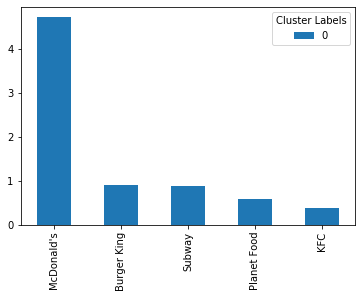

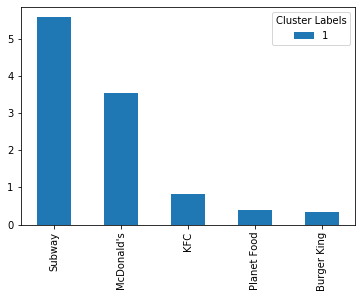

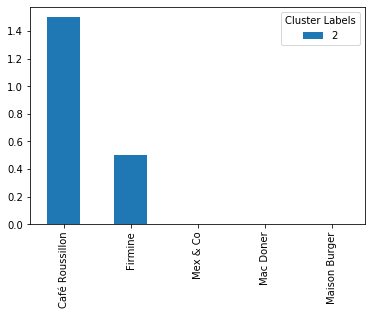

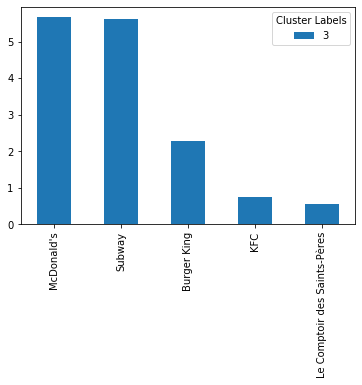

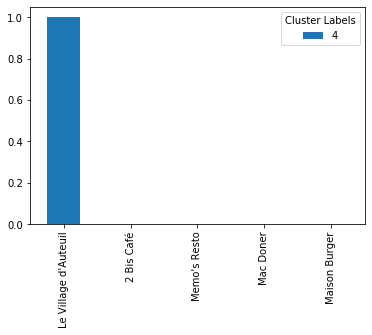

In [43]:
cluster_venues = paris_grouped.groupby(paris_grouped['Cluster Labels']).aggregate("sum")
cluster_venues.head()
clusterdf=cluster_venues.transpose()
for x in range (5):
    print('\n Top 5 Cluster', x)
    clusterdf[[x]].sort_values(by=[x], ascending=False).head(5).plot(kind = 'bar')


In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12.3)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = ['#8000ff', '#2adddd', '#0000cc', '#ff0000','333300','0000ff']
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris['Latitude'], paris['Longitude'], paris['Neighborhood'], paris['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#2adddd', '#0000cc', '#ff0000', '333300', '0000ff']


In [45]:
zone = paris[paris['Cluster Labels'] == 3]
zone.head(20)

,District,Neighborhood,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1e,Saint-Germain-l'Auxerrois,1 672,1 924,48.860211,2.336299,3,McDonald's,Meltem,Salam,Goguette,Le Petit Flore
1,1e,Halles,8 984,21 806,48.862466,2.346009,3,McDonald's,Subway,KFC,Burger King,Blend Argout
2,1e,Palais-Royal,3 195,11 661,48.863585,2.336204,3,McDonald's,Per Lei,Salam,Le Petit Flore,Restaurant Royal
3,1e,Place-Vendôme,3 044,11 316,48.867463,2.329428,3,Subway,McDonald's,Noon,The Rice Bar,Burger King
4,2e,Gaillon,1 345,7 154,48.869135,2.332909,3,McDonald's,Subway,King Marcel,King Marcel Paris Montmartre,Galerie Kebap
5,2e,Vivienne,2 917,11 955,48.868859,2.339363,3,McDonald's,Subway,King Marcel,Bocamexa,Frenchie to Go
6,2e,Mail,5 783,20 802,48.868054,2.344593,3,McDonald's,Subway,Le Petit Flore,Frenchie to Go,Restaurant Royal
7,2e,Bonne-Nouvelle,9 595,34 514,48.870623,2.348750,3,McDonald's,Subway,Entre deux,Nous,Entre 2 Portes
8,3e,Arts-et-Métiers,9 560,30 063,48.865441,2.356132,3,Subway,McDonald's,KFC,Burger King,Bocamexa
9,3e,Enfants-Rouges,8 562,31 478,48.864332,2.362611,3,Subway,McDonald's,Kebab Orient Express,Le Petit Marcel,Burger King


<H3> The zone we want want to focus on is the Cluster 3 zone.
An idea would be to focus on a neighborhood, where McDonald's, BK or Suwbay isn't already the 1st Venue

In [46]:
# Get names of indexes for which column Age has value 30
MacDon = zone[ zone['1st Most Common Venue'] == 'McDonald\'s' ].index
Subway = zone[ zone['1st Most Common Venue'] == 'Subway' ].index
BK = zone[ zone['1st Most Common Venue'] == 'Burger King' ].index
# Delete these row indexes from dataFrame
zone.drop(MacDon, inplace=True)
zone.drop(Subway, inplace=True)
zone.drop(BK, inplace=True)
zone.head(10)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,District,Neighborhood,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,6e,Saint-Germain-des-Prés,5 154,18 277,48.854429,2.333707,3,O'Tacos,Tazio,Mira,Goguette,Croissant Doré
24,7e,Saint-Thomas-d'Aquin,12 661,15 310,48.854926,2.325311,3,Le Comptoir des Saints-Pères,Les Deux Magots,Pizza Vesuvio,Özgül Kebab,G by Gaspard
26,7e,École-Militaire,12 895,15 959,48.851848,2.304756,3,Croc Nivert,Firmine,McDonald's,Café Roussillon,Özgül Kebab
45,12,Picpus,62 947,33 788,48.845075,2.401080,3,Chez Mémé,Chibby's Diner,Burger King,McDonald's,Subway
46,12,Bercy,13 987,7 350,48.836799,2.380847,3,Lucky House,Five Guys,EXKi,Burger King,L'Escale De Bercy
55,14,Plaisance,57 229,32 061,48.831780,2.314025,3,O'wit,Alésia Food,Grec,Kebab Antalya,G by Gaspard


<H3> In Picpus and Ecole Militaire, there are already BK,McDonald's, and in Bercy, we already have a Five Guys.

In [47]:
# Get names of indexes for which column Age has value 30
zone.drop((zone[ zone['2nd Most Common Venue'] == 'Five Guys' ]).index, inplace=True)
zone.drop((zone[ zone['3rd Most Common Venue'] == 'McDonald\'s' ]).index, inplace=True)
zone.drop((zone[ zone['3rd Most Common Venue'] == 'Burger King' ]).index, inplace=True)
zone.head(10)

,District,Neighborhood,Population,Density,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
23,6e,Saint-Germain-des-Prés,5 154,18 277,48.854429,2.333707,3,O'Tacos,Tazio,Mira,Goguette,Croissant Doré
24,7e,Saint-Thomas-d'Aquin,12 661,15 310,48.854926,2.325311,3,Le Comptoir des Saints-Pères,Les Deux Magots,Pizza Vesuvio,Özgül Kebab,G by Gaspard
55,14,Plaisance,57 229,32 061,48.831780,2.314025,3,O'wit,Alésia Food,Grec,Kebab Antalya,G by Gaspard


<H3> For last consideration, an deeper analysys could be done regarding to square meter cost, etc.
But the choosen place will be Saint-Germain-des-Près regarding to the touristic aspect of the zone.


<H1> There will be a new five guys in Saint Germain des Près